Перед нами стоит задача в распозновании рукописных цифр от 0 до 9.

Набор данных MNIST cостоит из 70000 изображений:60000 обучающих (которые нужно использовать для создания модели) и 10000 тестовых (которые применяются для тестирования нашей модели), в данной задаче  мы решили разбить в таком соотношении.

Нам нужно применить логистическую регрессию к нашим данным.

1. Опишим наши данные
   
   X-это массив размера 70000 на 784, который представляет собой 70000 изображение рукописных цифр, а X[i][j] представляет интенсивность пикселя. Так же стоит отметить, что интенсивность всегда имеет некоторое действительно число от 0 до 1, в связи с этим мы в дальнейшем будем делать соответствующие операции, чтобы нормализовать изображение. 
 
   Y-это одномерный массив меток, состоящий из 70000 значений от 0 до 9.
 

2. Эту задачу можно решить с помощью логистической регрессии, которая содержит в себе более чем 2 класса зависимых переменных. 

Но перед этим разберемся с логистической регрессией, которая содержит в себе 2 зависимые переменные, а потом уже перейдем к множественной.

Для начала запишем выражение, которое возвращает значения из интервала от 0 до 1 для всех X:
$$~p(X)=\frac{e^{w*X^t}}{1+e^{w*X^t}}$$
Это $\sigma(w*X^t)$, где $\sigma$ является логистической функцией.

Теперь преобразуем ее в след.вид:
$${e^{w*X^t}}=\frac{~p(X)}{1-~p(X)}$$

$\frac{~p(X)}{1-~p(X)}$-это называется риск наступления какого-либо события, которое принимает значения от 0 до бесконечности (если значение ближе к нулю, то шанс низкий, если ближе к бесконечности, то высокий).

Теперь прологарифмируем обе части нашего уравнения:

$$ln\left(\frac{~p(X)}{1-~p(X)}\right)=(w*X^t)$$

Правая часть линейна по X.

Нужно оценить неизвестный вектор $w$.

То есть мы попытаемся найти такую оценку $w$, которая при подставноки в модель для $~p(X)$ выводило число, которое близко к 0, если шанс высокий, а если низкий то ближе к 1. Для этого запишем ф-ию максимального правдоподобия.

Запишем функцию  максимального правдоподобия:

$$~L(w)=\varPi_~P(x_i)*\varPi~P(1-x_{i^{'}})$$

(<font color='blue'>и под П(произведением)первой должны находиться i:y=1, а под вторым i^':y^'=0</font>)


Метод правдоподобия говорит нам о том, что нужно максимизировать ф-ию правдоподобия.

Прологарифмируем ф-ию правдоподобия и заметим, что это ее максимизация эквивалентна минимизации логарифмической функции, которая взята со знаком минус.Сделали мы это для того, чтобы в дальнейшем нам было легче считать производную (от суммы считать производную легче, чем от произведения). 

$$ln(~L(w))=ln((\varPi_~P(x_i)*(\varPi~P(1-x_{i^{'}}))$$ 

Данное выражение называется ф-ей логистической ошибки.

Теперь перейдем к множественной логистической регрессии, по своей сути она не сильно отличается от 2-ух классовой.

Пусть $Y$ содержит в себе не два значения, а некое $K$.

Так как наша ф-ия линейно зависит Х, то теперь нам нужно, чтобы выражения от 1 до K-1 тоже были линейными, то есть:


$$ln\left(\frac{~p(X)_{_~K}}{1-~p(X)_1}\right)=(w_1*X^t)$$
$$ln\left(\frac{~p(X)_{_~K}}{1-~p(X)_2}\right)=(w_2*X^t)$$
$$.$$
$$.$$
$$.$$
$$ln\left(\frac{~p(X)_{_~K}}{1-~p(X)_{~K-1}}\right)=(w_{k-1}*X^t)$$

Прологарифмировав,получим функцию логистической ошибки.

In [3]:
import numpy as np
from sklearn.datasets import fetch_mldata#это нам нужно для того, чтобы выгрузить наш датасет(так как он встроенный)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt#для "показа" изображений

In [4]:
mnist = fetch_mldata('MNIST ORIGINAL')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
X,y = mnist['data'], mnist["target"]

In [146]:
X.shape #узнаем размер нашего массива

(70000, 784)

In [157]:
X[800][657]

253

In [147]:
y.shape

(70000,)

In [55]:
#посичтаем сколько раз какая цифра появляется в нашем датасете
for i in range(10):
    print ("цифра", i, "появляется", np.count_nonzero(y == i), "раз")

цифра 0 появляется 6903 раз
цифра 1 появляется 7877 раз
цифра 2 появляется 6990 раз
цифра 3 появляется 7141 раз
цифра 4 появляется 6824 раз
цифра 5 появляется 6313 раз
цифра 6 появляется 6876 раз
цифра 7 появляется 7293 раз
цифра 8 появляется 6825 раз
цифра 9 появляется 6958 раз


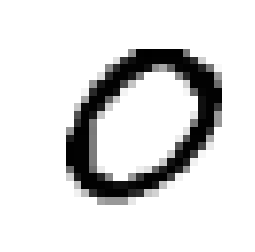

In [41]:
def plot_digit(digit1):
    digit1_image = digit1.reshape(28,28)
    plt.imshow(digit1_image, cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.show()
plot_digit(X[60081])

In [28]:
y[60081]

0.0

In [29]:
X_01= X[np.any([y == 0,y == 1], axis = 0)]
y_01= y[np.any([y == 0,y == 1], axis = 0)]

In [36]:
X_01.shape#для начала узнаем снова размер нашего датасета,чтобы проверить на что он будет выводить

(14780, 784)

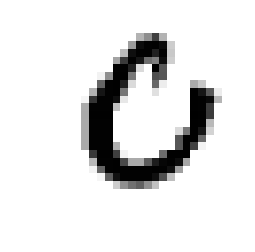

0.0


In [37]:
plot_digit(X_01[1478])
print(y_01[1478])

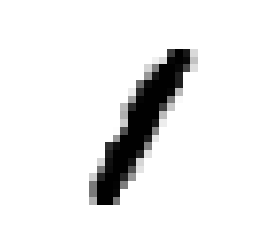

1.0


In [38]:
plot_digit(X_01[6008])
print(y_01[6008])

In [93]:
print("цифра 0 встречается-",np.count_nonzero(y_01 == 0))
print("цифра 1 встречается-",np.count_nonzero(y_01 == 1))

цифра 0 встречается- 6903
цифра 1 встречается- 7877


Перемешаем элементы теперь и разделим модель на тренировочный и тестовый датасеты соответственно.

In [70]:
shuffle_index = np.random.permutation(X_01.shape[0])
X_01_shuffled, y_01_shuffled = X_01[shuffle_index], y_01[shuffle_index]

train_proportion = 0.8
train_test_cut = int(len(X_01)*train_proportion)

X_train=X_01_shuffled[:train_test_cut]
X_test=X_01_shuffled[train_test_cut:]
y_train=y_01_shuffled[:train_test_cut]
y_test =y_01_shuffled[train_test_cut:]

print("Размер X_train", X_train.shape)
print("Размер X_test ", X_test.shape)

Размер X_train (11824, 784)
Размер X_test  (2956, 784)


In [117]:
X_train_normalised = X_train/255.0
X_test_normalised = X_test/255.0

In [118]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])
X_test_tr = X_test_normalised.transpose()
y_test_tr = y_test.reshape(1,y_test.shape[0])

print(X_train_tr.shape)
print(y_train_tr.shape)
print(X_test_tr.shape)
print(y_test_tr.shape)

dim_train = X_train_tr.shape[1]
dim_test = X_test_tr.shape[1]

print("Величина тренировочного датасета", dim_train)
print("Величина выгруженного датасета", dim_test)

(784, 11824)
(1, 11824)
(784, 2956)
(1, 2956)
Величина тренировочного датасета 11824
Величина выгруженного датасета 2956


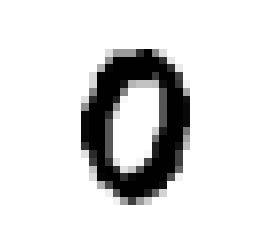

[0.]


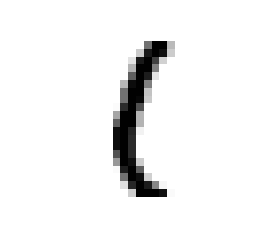

[1.]


In [124]:
plot_digit(X_train_tr[:,1786])
print(y_train_tr[:,1786])
plot_digit(X_train_tr[:,1896])
print(y_train_tr[:,1896])

Xtrain = X_train_tr
ytrain = y_train_tr
Xtest = X_test_tr
ytest = y_test_tr

Логистическая ф-ия(сигмоидная) f(x)=1/(1 + exp(-x)) используется в логистической регрессии.





В ней решается задача классификации с двумя классами (y=0 и y=1, где y — переменная, указывающая класс объекта), и делается предположение о том, что вероятность принадлежности объекта к одному из классов выражается через значения признаков этого объекта x_1,x_2,...,x_n (действительные числа)

In [120]:
def sigmoid(x):
    s= 1.0 / (1.0 + np.exp(-x))
    return s

выгрузка логистической регрессии

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
logregressor = LogisticRegression()

In [128]:
X1 = Xtest.T
Y1 = ytest.T.ravel()

logregressor.fit(X1,Y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
logregressor.score(X1,Y1)

1.0

In [125]:
sum(logregressor.predict(X1) == Y1) / len(X1)

1.0

То, что тут 1-это, скорее всего в корне неправильно, но я пока не очень поняла, как применять лог.регрессию к этим данным :(

In [6]:
import torch